<a href="https://colab.research.google.com/github/DanieloSendi/Deep-Learning-Lab/blob/main/09_NLP_Encoding_Embedding_Recurrent_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NLP - Encoding, Embedding, Recurrent Neural Networks**

***
## Vectorization - One-hot encoding or word embeding?
***

We cannot feed lists of integers into a neural network. We have to turn our lists into tensors. There are many ways we could do that:
- We could pad our lists so that they all have the same length, and turn them into an integer tensor of shape (samples, word_indices), then use as the first layer in our network a layer capable of handling such integer tensors (the Embedding layer, which we will cover in detail later in the book).
- We could one-hot-encode our lists to turn them into vectors of 0s and 1s. Concretely, this would mean for instance turning the sequence [3, 5] into a 10,000-dimensional vector that would be all-zeros except for indices 3 and 5, which would be ones. Then we could use as the first layer in our network a Dense layer, capable of handling floating-point vector data.

Alternatively to the two solutions above, we could use a techniqe called word embeding. It is much more sophisticated method. Mapping words into dictionaries, that we explained before, is usefull only to a certain degree. It treats each word separately and only realy assess the text by checking if a word (or a combination of words) exists. It does not understand the meaning of a word. Furthermore, simmilar words are treated as a separate entries in a dictionary (for example 'run', 'runs', 'running' will be 3 different words). We can use some pre-processing to cut prefixes and suffixes, but it will only work for some words.

What the word embedding tries to achieve is parametrise the meaning of the words - for example map if they are a noun or a verb, assess the tense or a gender, or even specify some more complex categories like object, animal, vehicle etc. What we have to do is specify how many of those parameters we want and then we place each word in an n-dimensional space related to each parameter. Again, the beauty of the neural networks comes from the fact, that we do not need to specify what those parameters are - maybe for one problem we would need to differ if the word is a noun or a verb, and for other problem if it is a dog or cat breed. The network will learn all of it during training. Simmilar to ConvNet filters, we only need to decide how many parameters we want in our Embedding layer. If the embedding is large, the network will better understand nuances between words. But if it is too large, it will compute slow and can lead to overfitting. You probably already noticed some similarities.

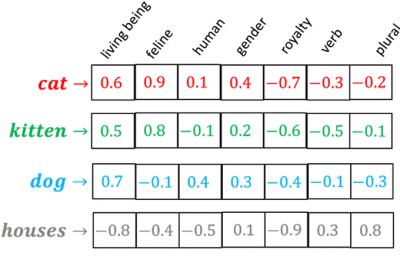


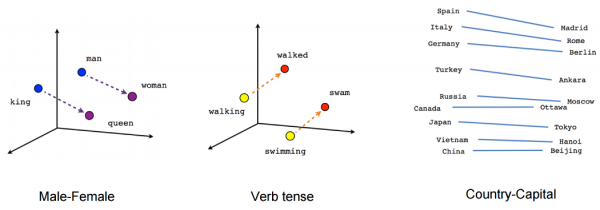

Better explanation of word embedding can be found [here](https://towardsdatascience.com/deep-learning-4-embedding-layers-f9a02d55ac12) and [here](https://www.tensorflow.org/text/guide/word_embeddings).

***
## Introduction to RNN
***

Recurrent Neural Network is a generalization of a feedforward neural network that has internal memory. RNN is recurrent in nature as it performs the same function for every input of data while the output of the current input depends on the past one computation. After producing the output, it is copied and sent back into the recurrent network. For making a decision, it considers the current input and the output that it has learned from the previous input.

Unlike feedforward neural networks, RNNs can use their internal state (memory) to process sequences of inputs. This makes them applicable to tasks such as unsegmented, connected handwriting recognition or speech recognition. In other neural networks all the inputs are independent of each other, but in RNN all the inputs are related to each other.

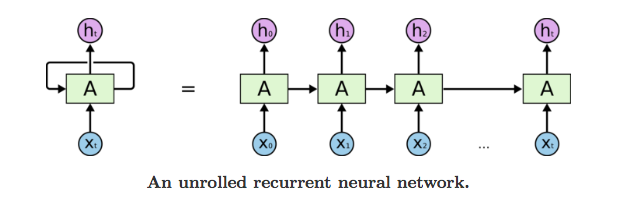

Recurrent networks take as their input not just the current input example they see, but also what they have perceived previously in time. Here’s a diagram of an early, simple recurrent net proposed by Elman, where the BTSXPE at the bottom of the drawing represents the input example in the current moment, and CONTEXT UNIT represents the output of the previous moment.

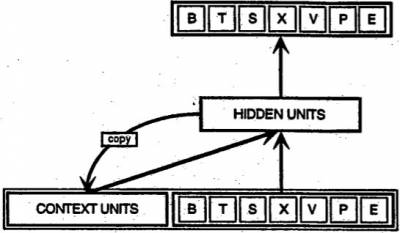

### Import packages

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
import matplotlib.pyplot as plt

from keras.layers import LSTM

### Return_sequences

Like all recurrent layers in Keras, SimpleRNN can be run in two different modes: it can return either the full sequences of successive outputs for each timestep (a 3D tensor of shape (batch_size, timesteps, output_features)), or it can return only the last output for each input sequence (a 2D tensor of shape (batch_size, output_features)). These two modes are controlled by the return_sequences constructor argument.

In [ ]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### Stacking multiple layers

It is sometimes useful to stack several recurrent layers one after the other in order to increase the representational power of a network. In such a setup, you have to get all intermediate layers to return full sequences. In the following example we put together 4 SimpleRNN layers, the last one without parameter `return_sequences=True` as it only returns the last outputs).
Model summary:

### Preprocess data

Let's train a simple recurrent network using an Embedding layer and a SimpleRNN layer. We will use the IMDB movie review classification problem to try the RNN models. First, let's preprocess the data:

In [ ]:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=10000)

#Pad sequences:
print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=500)
input_test = sequence.pad_sequences(input_test, maxlen=500)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


### Training a simple RNN

Architecture:
- Embedding layer (max_features=10000, 32)
- One or more SimpleRNN - 32
- `Dense layer` with one neuron and sigmoid activation

Compile:
- rmsprop optimizer,
- binary_crossentropy loss function,
- accuracy metrics.

Train:
- epochs=10,
- batch_size=128,
- validation_split=0.2

In [ ]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(input_train,
                    y_train,
                    batch_size=128,
                    epochs=10,
                    validation_split=0.2)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 35s 187ms/step - accuracy: 0.5363 - loss: 0.6874 - val_accuracy: 0.6920 - val_loss: 0.5898
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 19s 124ms/step - accuracy: 0.7584 - loss: 0.5186 - val_accuracy: 0.7174 - val_loss: 0.5693
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 14s 89ms/step - accuracy: 0.8440 - loss: 0.3648 - val_accuracy: 0.8474 - val_loss: 0.3727
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 18s 76ms/step - accuracy: 0.8849 - loss: 0.2841 - val_accuracy: 0.8388 - val_loss: 0.3839
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 71ms/step - accuracy: 0.9129 - loss: 0.2257 - val_accuracy: 0.8358 - val_loss: 0.4653
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 11s 69ms/step - accuracy: 0.9442 - loss: 0.1577 - val_accuracy: 0.8018 - val_loss: 0.4690
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 70ms/step - accuracy: 0.9569 - loss: 0.1252 - val_accuracy: 0.8350 - val_loss: 0.4534
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 11s 72ms/step - accuracy: 0.9752 - loss: 0.0762 

In [ ]:
test_loss, test_accuracy = model.evaluate(input_test, y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.8320 - loss: 0.5803


In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Plot the training and validation loss and accuracy:

### Outcome analysis

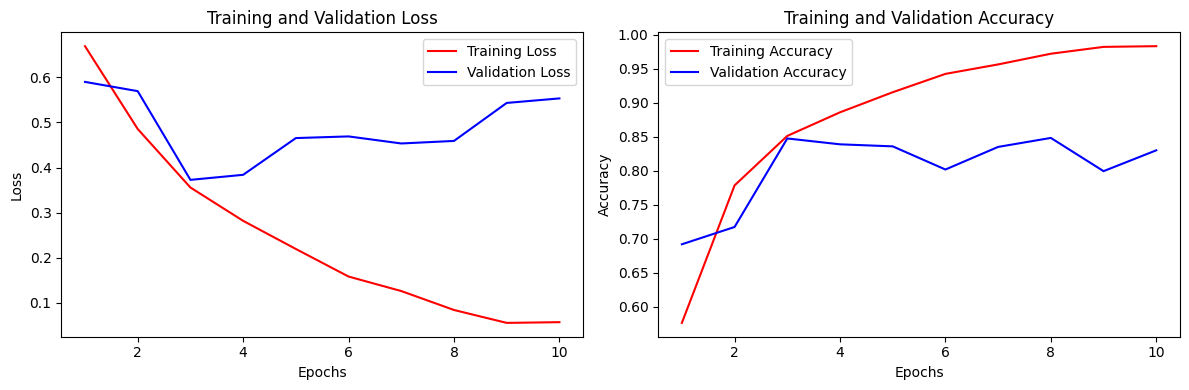

In [ ]:
# Extract values from the training history
training_loss = history_dict['loss']
validation_loss = history_dict['val_loss']
training_accuracy = history_dict['accuracy']
validation_accuracy = history_dict['val_accuracy']

# Setup the subplots for loss and accuracy
plt.figure(figsize=(12, 4))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(range(1, len(training_loss) + 1), training_loss, 'r-', label='Training Loss')
plt.plot(range(1, len(validation_loss) + 1), validation_loss, 'b-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, len(training_accuracy) + 1), training_accuracy, 'r-', label='Training Accuracy')
plt.plot(range(1, len(validation_accuracy) + 1), validation_accuracy, 'b-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

***
## LSTM layers
***

Long Short-Term Memory (LSTM) networks are a modified version of recurrent neural networks, which makes it easier to remember past data in memory. The vanishing gradient problem of RNN is resolved here. LSTM is well-suited to classify, process and predict time series given time lags of unknown duration. It trains the model by using back-propagation. In an LSTM network, three gates are present:

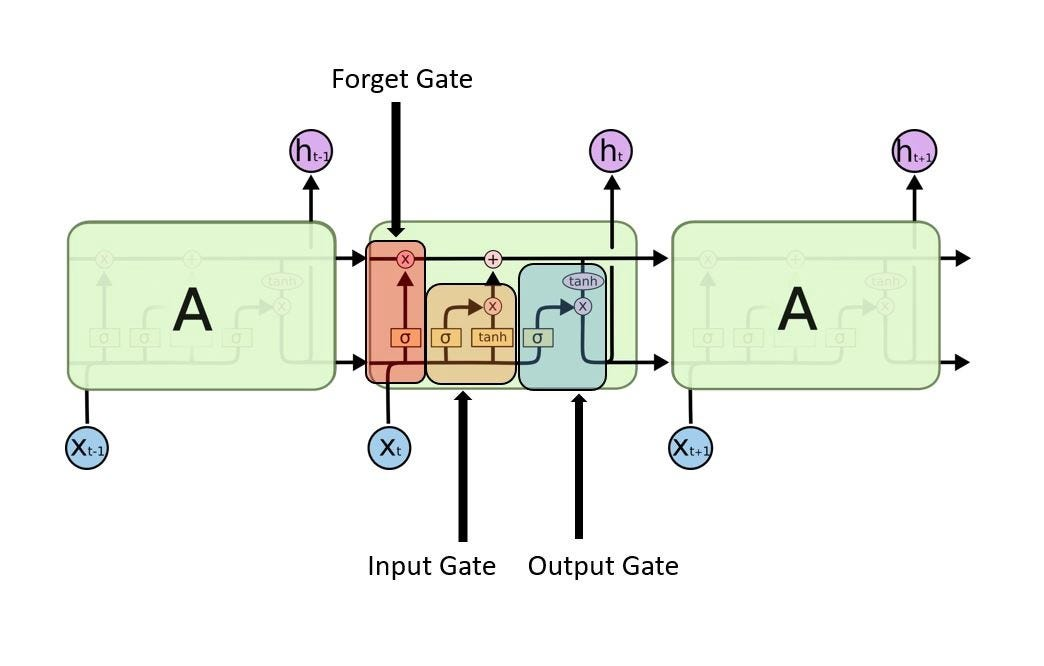

Now let's set up a model using a LSTM layer and train it on the IMDB data. The network will be similar to the one with SimpleRNN that you just implemented. We only specify the output dimensionality of the LSTM layer, and leave every other argument (there are lots) to the Keras defaults.

Architecture:
 Embedding layer - 10000, 32
- LSTM - 32
- `Dense layer` with one output and sigmoid activation

Compile:
- optimizer='rmsprop',
- loss='binary_crossentropy',
- metrics=['acc'].

Train:
- epochs=10,
- batch_size=128,
- validation_split=0.2

In [ ]:
model2 = Sequential()
model2.add(Embedding(10000, 32))
model2.add(LSTM(32))
model2.add(Dense(1, activation='sigmoid'))

In [ ]:
model2.compile(optimizer='rmsprop',
               loss='binary_crossentropy',
               metrics=['accuracy'])

In [ ]:
history2 = model2.fit(input_train,
                      y_train,
                      batch_size=128,
                      epochs=10,
                      validation_split=0.2)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.5865 - loss: 0.6618 - val_accuracy: 0.7416 - val_loss: 0.5410
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.8091 - loss: 0.4284 - val_accuracy: 0.8550 - val_loss: 0.3483
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.8585 - loss: 0.3430 - val_accuracy: 0.8346 - val_loss: 0.3923
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.8684 - loss: 0.3233 - val_accuracy: 0.8760 - val_loss: 0.3050
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.8816 - loss: 0.2953 - val_accuracy: 0.8548 - val_loss: 0.3379
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.8994 - loss: 0.2657 - val_accuracy: 0.8784 - val_loss: 0.3138
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.9058 - loss: 0.2424 - val_accuracy: 0.7786 - val_loss: 0.5566
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.9105 - loss: 0.2316 - val_accu

In [ ]:
model2.evaluate(input_test, y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8483 - loss: 0.3447


[0.34222203493118286, 0.8508800268173218]

In [ ]:
history_dict2 = history2.history
history_dict2.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Plot the training and validation loss and accuracy and compare them with SimpleRNN:

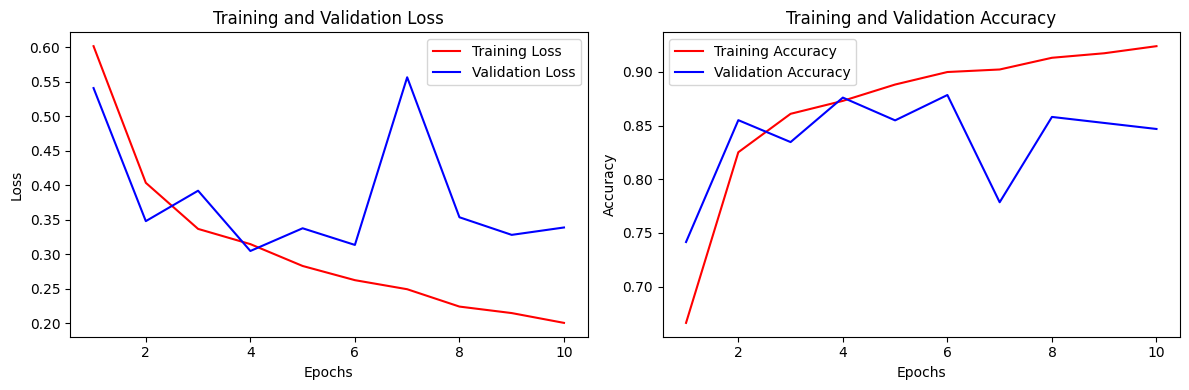

In [ ]:
# Extract values from the training history
training_loss = history_dict2['loss']
validation_loss = history_dict2['val_loss']
training_accuracy = history_dict2['accuracy']
validation_accuracy = history_dict2['val_accuracy']

# Setup the subplots for loss and accuracy
plt.figure(figsize=(12, 4))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(range(1, len(training_loss) + 1), training_loss, 'r-', label='Training Loss')
plt.plot(range(1, len(validation_loss) + 1), validation_loss, 'b-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, len(training_accuracy) + 1), training_accuracy, 'r-', label='Training Accuracy')
plt.plot(range(1, len(validation_accuracy) + 1), validation_accuracy, 'b-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

The LSTM network achieved a similar result to SimpleRNN, but the initial learning phase was much faster.

## Three RNN layers

In [ ]:
model3 = Sequential()
model3.add(Embedding(10000, 32))
model3.add(SimpleRNN(32, return_sequences=True))
model3.add(SimpleRNN(32, return_sequences=True))
model3.add(SimpleRNN(32, return_sequences=True))
model3.add(SimpleRNN(32))
model3.add(Dense(1, activation='sigmoid'))

model3.compile(optimizer='rmsprop',
               loss='binary_crossentropy',
               metrics=['accuracy'])

history3 = model3.fit(input_train,
                      y_train,
                      batch_size=128,
                      epochs=10,
                      validation_split=0.2)

model3.evaluate(input_test, y_test)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 50s 281ms/step - accuracy: 0.5164 - loss: 0.7019 - val_accuracy: 0.6858 - val_loss: 0.5908
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 39s 249ms/step - accuracy: 0.7695 - loss: 0.4944 - val_accuracy: 0.7974 - val_loss: 0.4770
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 38s 228ms/step - accuracy: 0.8591 - loss: 0.3428 - val_accuracy: 0.8292 - val_loss: 0.4023
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 41s 228ms/step - accuracy: 0.9086 - loss: 0.2407 - val_accuracy: 0.8546 - val_loss: 0.3996
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 41s 229ms/step - accuracy: 0.9471 - loss: 0.1486 - val_accuracy: 0.7622 - val_loss: 0.6004
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 40s 222ms/step - accuracy: 0.9715 - loss: 0.0821 - val_accuracy: 0.8190 - val_loss: 0.5811
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 35s 222ms/step - accuracy: 0.9876 - loss: 0.0384 - val_accuracy: 0.7618 - val_loss: 0.8774
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 36s 233ms/step - accuracy: 0.9923 - loss: 0

[1.011847734451294, 0.7976400256156921]

In [ ]:
history_dict3 = history3.history
history_dict3.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

A network with additional layers accentuates overfitting - the network learns too many details of the training set, resulting in lower performance on the validation and test set than with only one RNN layer

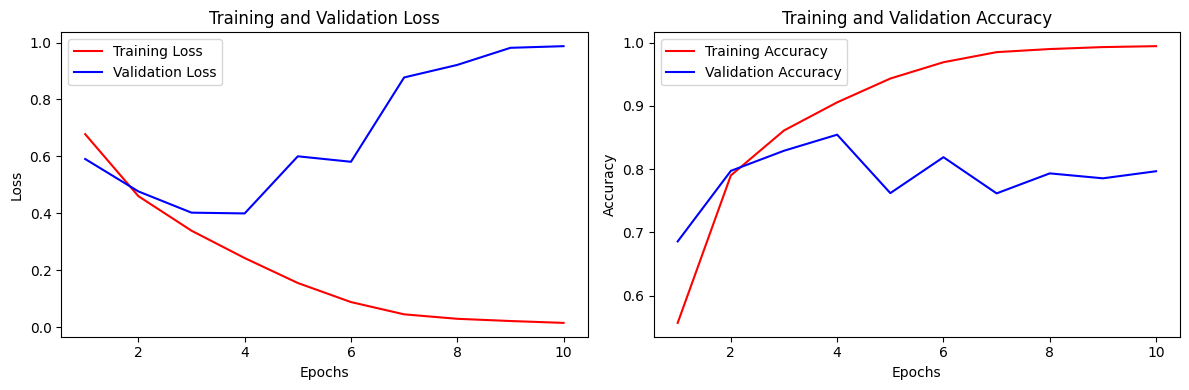

In [ ]:
# Extract values from the training history
training_loss = history_dict3['loss']
validation_loss = history_dict3['val_loss']
training_accuracy = history_dict3['accuracy']
validation_accuracy = history_dict3['val_accuracy']

# Setup the subplots for loss and accuracy
plt.figure(figsize=(12, 4))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(range(1, len(training_loss) + 1), training_loss, 'r-', label='Training Loss')
plt.plot(range(1, len(validation_loss) + 1), validation_loss, 'b-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, len(training_accuracy) + 1), training_accuracy, 'r-', label='Training Accuracy')
plt.plot(range(1, len(validation_accuracy) + 1), validation_accuracy, 'b-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Adjust layout and display the plots
plt.tight_layout()
plt.show()